# Explanatory Data Analysis Challenge (Olympic Games)

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [2]:
import pandas as pd
import numpy as np

In [3]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dicto = pd.read_csv("dictionary.csv")

In [4]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [6]:
dicto.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [7]:
dicto.isna().sum(axis= 0)

Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64

## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [8]:
summer["Edition"] = "Summer"
winter["Edition"] = "Winter"

In [9]:
olympic = pd.concat([summer,winter])

In [10]:
olympic

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter


In [11]:
dicto.rename(columns = {"Code": "Code_dicto"}, inplace= True)
olympic.rename(columns = {"Country": "Code"}, inplace= True)

In [12]:
dicto.columns

Index(['Country', 'Code_dicto', 'Population', 'GDP per Capita'], dtype='object')

In [13]:
olympic = olympic.merge(dicto.loc[:, ['Country', 'Code_dicto']], how= "left", left_on= "Code", right_on= "Code_dicto")

In [14]:
olympic

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Code_dicto
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,HUN
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria,AUT
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece,GRE
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece,GRE
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,United Kingdom,GBR
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,United States,USA
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Canada,CAN
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter,Czech Republic,CZE


In [15]:
olympic.drop(columns="Code_dicto", inplace= True)

## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! (Alternatively, you can find a Solution for this at the end of this Notebook!) 

In [16]:
olympic.columns = olympic.columns.str.strip()
dicto.rename(columns= {"GDP per Capita": "GDP"}, inplace= True)

In [17]:
olympic.isna().sum(axis =0)

Year             0
City             0
Sport            0
Discipline       0
Athlete          0
Code             4
Gender           0
Event            0
Medal            0
Edition          0
Country       6367
dtype: int64

In [18]:
olympic.loc[olympic.Code.isna()].index

Int64Index([29603, 31072, 31091, 31110], dtype='int64')

In [19]:
olympic.drop(index = olympic.loc[olympic.Code.isna()].index, inplace= True)

In [20]:
olympic.isna().sum(axis =0)

Year             0
City             0
Sport            0
Discipline       0
Athlete          0
Code             0
Gender           0
Event            0
Medal            0
Edition          0
Country       6363
dtype: int64

In [21]:
olympic.loc[olympic.isna().any(axis=1)].head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
132,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Summer,NaN
133,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Summer,NaN
134,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Summer,NaN
135,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Summer,NaN
136,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Summer,NaN


In [22]:
olympic.shape

(36931, 11)

In [23]:
countries_dicto = {'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

In [24]:
list(countries_dicto.values())

['Soviet Union',
 'East Germany',
 'Romania',
 'West Germany',
 'Czechoslovakia',
 'Yugoslavia',
 'Unified Team',
 'Unified Team of Germany',
 'Mixed teams',
 'Serbia',
 'Australasia',
 'Russian Empire',
 'Montenegro',
 'Trinidad and Tobago',
 'Bohemia',
 'West Indies Federation',
 'Singapore',
 'Independent Olympic Participants']

In [25]:
missing_countries = pd.Series(data= list(countries_dicto.values()), index=list(countries_dicto.keys()))
missing_countries

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
dtype: object

In [26]:
olympic.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code', 'Gender',
       'Event', 'Medal', 'Edition', 'Country'],
      dtype='object')

In [27]:
olympic.Country.isnull()#.value_counts()

0        False
1        False
2        False
3        False
4        False
         ...  
36930    False
36931    False
36932    False
36933    False
36934    False
Name: Country, Length: 36931, dtype: bool

In [28]:
olympic.loc[olympic.Country.isnull(), "Code"].map(missing_countries)#.value_counts()

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6363, dtype: object

In [29]:
olympic.Code.map(missing_countries)#.value_counts()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
36930    NaN
36931    NaN
36932    NaN
36933    NaN
36934    NaN
Name: Code, Length: 36931, dtype: object

In [30]:
olympic.Country.fillna(olympic.Code.map(missing_countries), inplace = True)

In [31]:
olympic.isna().sum(axis =0)

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Code          0
Gender        0
Event         0
Medal         0
Edition       0
Country       0
dtype: int64

## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [32]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        36931 non-null  int64 
 1   City        36931 non-null  object
 2   Sport       36931 non-null  object
 3   Discipline  36931 non-null  object
 4   Athlete     36931 non-null  object
 5   Code        36931 non-null  object
 6   Gender      36931 non-null  object
 7   Event       36931 non-null  object
 8   Medal       36931 non-null  object
 9   Edition     36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [33]:
olympic.Medal = olympic.Medal.astype("category")

In [34]:
olympic.Medal = olympic.Medal.cat.set_categories(["Bronze" , "Silver" , "Gold"], ordered= True)

In [35]:
olympic.Medal

0          Gold
1        Silver
2        Bronze
3          Gold
4        Silver
          ...  
36930    Bronze
36931      Gold
36932    Silver
36933      Gold
36934    Bronze
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
olympic.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code', 'Gender',
       'Event', 'Medal', 'Edition', 'Country'],
      dtype='object')

In [38]:
olympic.groupby("Country").Medal.count().sort_values(ascending= False)[0:10]

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Medal, dtype: int64

In [39]:
top_10_countries = list(olympic.groupby("Country").Medal.count().sort_values(ascending= False)[0:10].keys())
top_10_countries

['United States',
 'Soviet Union',
 'United Kingdom',
 'Germany',
 'France',
 'Italy',
 'Sweden',
 'Canada',
 'Australia',
 'Hungary']

In [40]:
plt.rcdefaults()

In [41]:
olympic_top_10 = olympic.loc[olympic.Country.isin(top_10_countries)]
olympic_top_10

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Summer,Hungary
11,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,Summer,United States
12,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Summer,Hungary
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,Summer,United States
...,...,...,...,...,...,...,...,...,...,...,...
36928,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Winter,Germany
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,United Kingdom
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,United States
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Canada


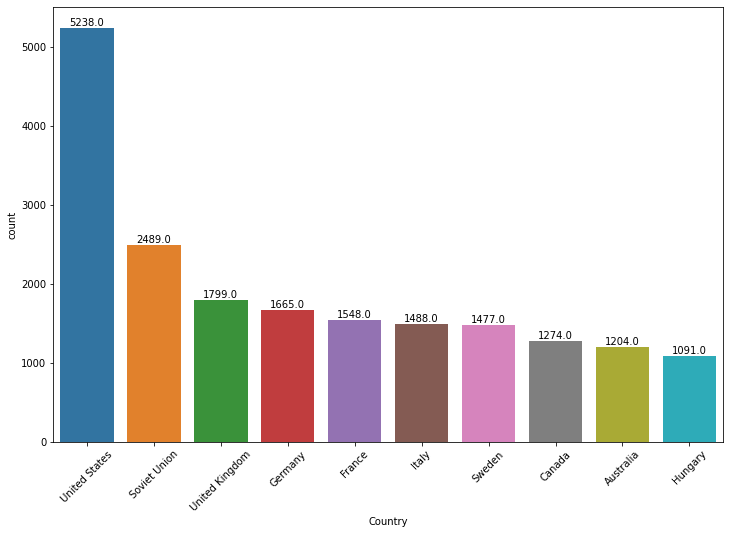

In [42]:
plt.figure(figsize= (12, 8))
sns.countplot(data= olympic_top_10, x= "Country", order= top_10_countries)
plt.xticks(rotation=45)
# Add labels over bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

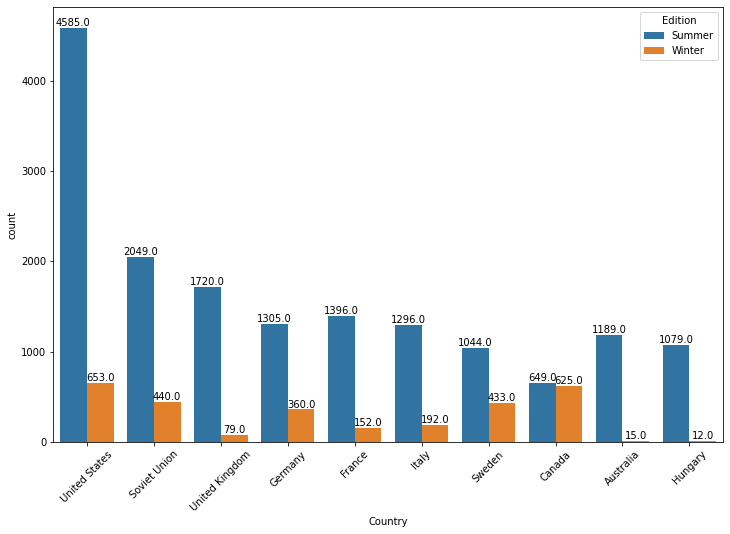

In [43]:
plt.figure(figsize= (12, 8))
sns.countplot(data= olympic_top_10, x= "Country", hue= "Edition", order= top_10_countries)
plt.xticks(rotation=45)
# Add labels over bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

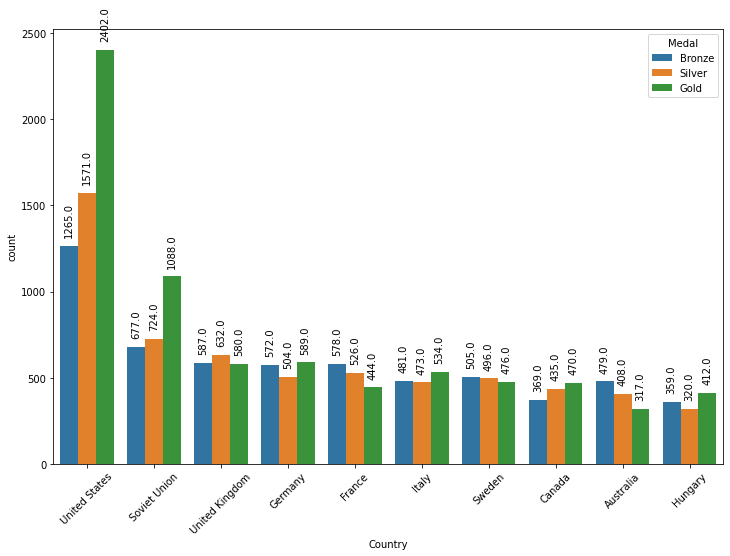

In [44]:
plt.figure(figsize= (12, 8))
sns.countplot(data= olympic_top_10, x= "Country", hue= "Medal", order= top_10_countries)
plt.xticks(rotation=45)


# Add labels over bars
ax = plt.gca()
rotation_angle = 90
font_size = 10
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()+50), ha='center', va='bottom', rotation=rotation_angle, fontsize=font_size)

first_bar_height  = ax.patches[1].get_height()

#plt.ylim(0, first_bar_height + 100)
plt.show()

In [45]:
olympic_top_10

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Summer,Hungary
11,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,Summer,United States
12,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Summer,Hungary
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,Summer,United States
...,...,...,...,...,...,...,...,...,...,...,...
36928,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Winter,Germany
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,United Kingdom
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,United States
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Canada


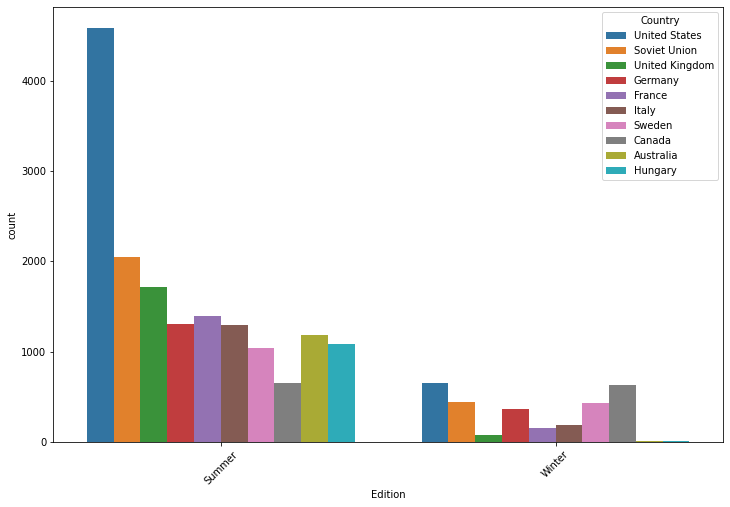

In [46]:
plt.figure(figsize= (12, 8))
sns.countplot(data= olympic_top_10, x= "Edition", hue = "Country", hue_order= top_10_countries)
plt.xticks(rotation=45)




#plt.ylim(0, first_bar_height + 100)
plt.show()

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

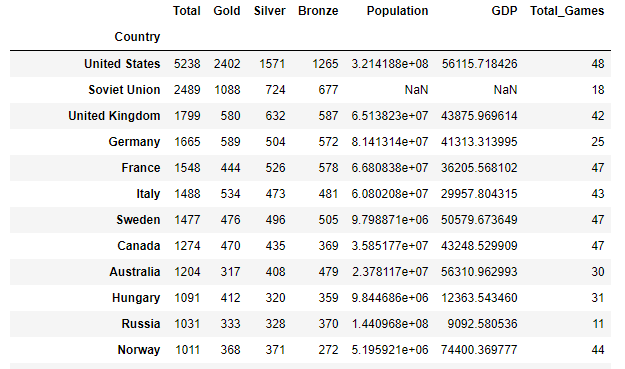

In [47]:
top_50_countries = list(olympic.groupby("Country").Medal.count().sort_values(ascending= False)[0:50].keys())


In [48]:
olympic_top_50 = olympic.loc[olympic.Country.isin(top_50_countries)]

In [49]:
olympic_top_50.groupby(["Country"]).Medal.count()

Country
Argentina                   259
Australia                  1204
Austria                     426
Belarus                     128
Belgium                     424
Brazil                      431
Bulgaria                    339
Canada                     1274
China                       889
Croatia                     125
Cuba                        410
Czech Republic              131
Czechoslovakia              487
Denmark                     512
East Germany                987
Finland                     890
France                     1548
Germany                    1665
Greece                      148
Hungary                    1091
India                       184
Iran                         61
Italy                      1488
Jamaica                     127
Japan                       851
Kenya                        93
Korea, South                616
Mexico                      106
Netherlands                 973
New Zealand                 191
Nigeria                      84


In [50]:
olympic_top_50_medals = olympic_top_50.groupby(["Country", "Medal"]).Medal.count().unstack(fill_value= 0)[["Gold", "Silver", "Bronze"]].sort_values(["Gold", "Silver", "Bronze"], ascending= False)
olympic_top_50_medals.head()

Medal,Gold,Silver,Bronze
Country,,,
United States,2402,1571,1265
Soviet Union,1088,724,677
Germany,589,504,572
United Kingdom,580,632,587
Italy,534,473,481


In [51]:
olympic_top_50_medals.insert(0, "Total", olympic_top_50_medals.sum(axis=1)) 

In [52]:
olympic_top_50_medals.head()

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
Germany,1665,589,504,572
United Kingdom,1799,580,632,587
Italy,1488,534,473,481


In [53]:
dicto

,Country,Code_dicto,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [54]:
dicto.set_index("Country", inplace= True)

In [55]:
dicto.rename(columns= {"GDP per Capita": "GDP"}, inplace= True)

In [56]:
dicto.loc[:, ["Population", "GDP"]]

,Population,GDP
Country,,
Afghanistan,32526562.0,594.323081
Albania,2889167.0,3945.217582
Algeria,39666519.0,4206.031232
American Samoa*,55538.0,NaN
Andorra,70473.0,NaN
...,...,...
Vietnam,91703800.0,2111.138024
Virgin Islands*,103574.0,NaN
Yemen,26832215.0,1406.291651


In [57]:
olympic_top_50_medals = olympic_top_50_medals.join(dicto.loc[:, ["Population", "GDP"]])

In [58]:
olympic_top_50_medals.head()

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
Germany,1665,589,504,572,81413145.0,41313.313995
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Italy,1488,534,473,481,60802085.0,29957.804315


In [59]:
olympic_top_50.loc[:, ["Year", "Edition", "Country"]].drop_duplicates().groupby("Country").Year.count().sort_values()

Country
Unified Team                2
Unified Team of Germany     6
Uruguay                     8
Nigeria                     8
Ukraine                     9
Pakistan                    9
Croatia                    10
Czech Republic             10
Belarus                    11
Kenya                      11
Russia                     11
East Germany               11
West Germany               12
Cuba                       14
Jamaica                    14
Iran                       15
China                      15
Turkey                     16
India                      17
South Africa               17
Soviet Union               18
Argentina                  18
Yugoslavia                 18
Greece                     18
Brazil                     18
Mexico                     19
Bulgaria                   19
Romania                    19
Spain                      20
New Zealand                21
Korea, South               22
Germany                    25
Czechoslovakia             27
Po

In [60]:
Total_Games = olympic_top_50.loc[:, ["Year", "Edition", "Country"]].drop_duplicates().groupby("Country").Year.count().sort_values()

In [61]:
olympic_top_50_medals["Total_Games"] = Total_Games

In [62]:
olympic_top_50_medals

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,3.214188e+08,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
Germany,1665,589,504,572,8.141314e+07,41313.313995,25
United Kingdom,1799,580,632,587,6.513823e+07,43875.969614,42
Italy,1488,534,473,481,6.080208e+07,29957.804315,43
Sweden,1477,476,496,505,9.798871e+06,50579.673649,47
Canada,1274,470,435,369,3.585177e+07,43248.529909,47
France,1548,444,526,578,6.680838e+07,36205.568102,47
Hungary,1091,412,320,359,9.844686e+06,12363.543460,31


2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

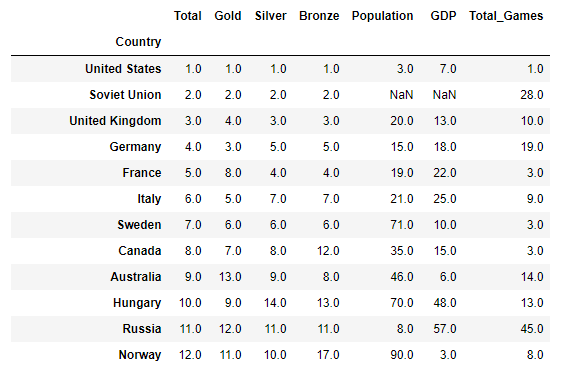

In [63]:
olympic_top_50_medals.drop(columns= ["Gold", "Silver", "Bronze"]).head(3)

,Total,Population,GDP,Total_Games
Country,,,,
United States,5238,321418820.0,56115.718426,48
Soviet Union,2489,NaN,NaN,18
Germany,1665,81413145.0,41313.313995,25


In [64]:
olympic_top_50_medals_ranked = olympic_top_50_medals.drop(columns= ["Gold", "Silver", "Bronze"]).apply(lambda x: x.rank(ascending = False), axis= 0).sort_values(by = "Total")
olympic_top_50_medals_ranked.head()

,Total,Population,GDP,Total_Games
Country,,,,
United States,1.0,3.0,4.0,1.0
Soviet Union,2.0,NaN,NaN,28.0
United Kingdom,3.0,14.0,8.0,10.0
Germany,4.0,10.0,12.0,19.0
France,5.0,13.0,15.0,3.0


## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

## Spearman correlation uses __RANKS__, Pearson correlation uses __RAW__ data

In [65]:
olympic_top_50_medals_ranked.corr(method = 'spearman')

,Total,Population,GDP,Total_Games
Total,1.000000,0.090463,0.667915,0.681869
Population,0.090463,1.000000,-0.303659,-0.101508
GDP,0.667915,-0.303659,1.000000,0.811075
Total_Games,0.681869,-0.101508,0.811075,1.000000


## FOR all countries

In [66]:
medals_by_country = pd.crosstab(index= olympic.Country, columns= olympic.Medal, margins= True, margins_name= "Total")
medals_by_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29
...,...,...,...,...
West Indies Federation,5,0,0,5
Yugoslavia,119,180,143,442
Zambia,1,1,0,2


In [67]:
medals_by_country.drop("Total", inplace= True) # Droping last ROW

In [68]:
medals_by_country.columns

Index(['Bronze', 'Silver', 'Gold', 'Total'], dtype='object', name='Medal')

In [69]:
medals_by_country = medals_by_country.sort_values(by= "Total", ascending= False)
medals_by_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
United States,1265,1571,2402,5238
Soviet Union,677,724,1088,2489
United Kingdom,587,632,580,1799
Germany,572,504,589,1665
France,578,526,444,1548
...,...,...,...,...
Iraq,1,0,0,1
Senegal,0,1,0,1
Macedonia,1,0,0,1


In [70]:
medals_by_country = medals_by_country.loc[:, ["Total", "Gold", "Silver", "Bronze"]]

In [71]:
medals_by_country = medals_by_country.join(dicto, how = "left").drop(columns= "Code_dicto")
medals_by_country

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388
Senegal,1,0,1,0,15129273.0,899.579879
Macedonia,1,0,0,1,2078453.0,4852.657848


In [72]:
total_games = olympic.loc[:, ["Year", "Edition", "Country"]].drop_duplicates().groupby("Country").Year.count().sort_values()

In [73]:
medals_by_country["Total_games"] = total_games

In [74]:
medals_by_country

,Total,Gold,Silver,Bronze,Population,GDP,Total_games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Germany,1665,589,504,572,81413145.0,41313.313995,25
France,1548,444,526,578,66808385.0,36205.568102,47
...,...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388,1
Senegal,1,0,1,0,15129273.0,899.579879,1
Macedonia,1,0,0,1,2078453.0,4852.657848,1


In [75]:
medals_by_country.drop(columns= ["Gold", "Silver", "Bronze"]).corr("spearman")

,Total,Population,GDP,Total_games
Total,1.000000,0.419755,0.458478,0.927611
Population,0.419755,1.000000,-0.239097,0.402098
GDP,0.458478,-0.239097,1.000000,0.498056
Total_games,0.927611,0.402098,0.498056,1.000000


### Hypothesis 1: There is no relationship between Total Medals and Poluplation

In [76]:
import scipy.stats as stats

In [77]:
stats.spearmanr(medals_by_country.Total, medals_by_country.Population, nan_policy= "omit")

SignificanceResult(statistic=0.41975527887063924, pvalue=8.132240868116897e-07)

In [78]:
r, p_value = stats.spearmanr(medals_by_country.Total, medals_by_country.Population, nan_policy= "omit")

In [79]:
r

0.41975527887063924

In [80]:
round(p_value)

0

### Reject hypothesis 1 -> Ther is significant positive releationship 0.42

## Aggregating and Ranking

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

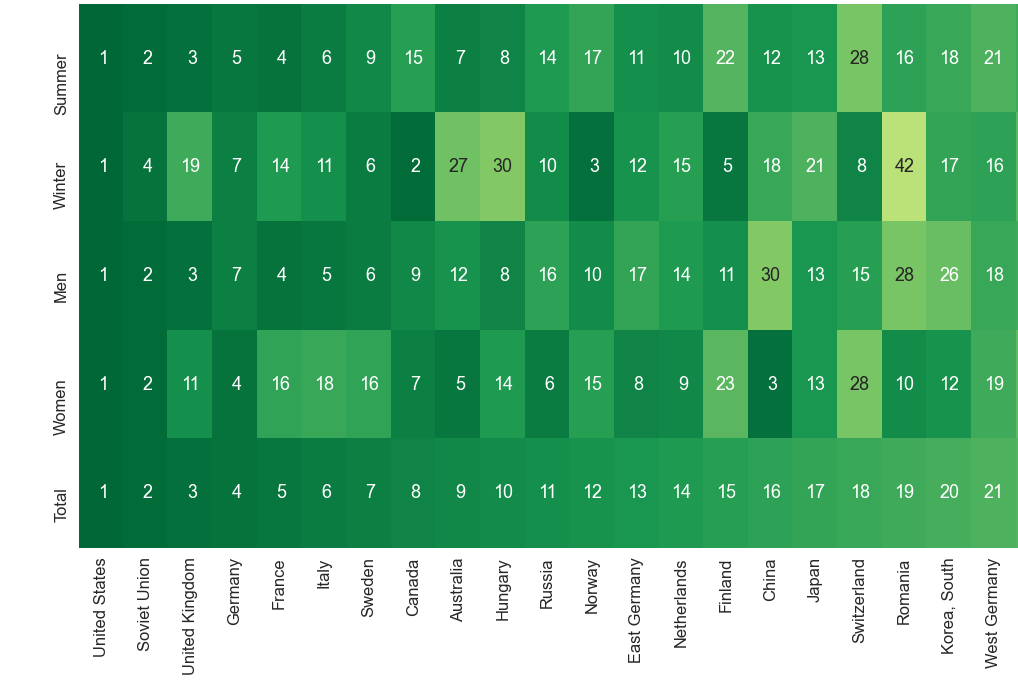

In [81]:
h_df = olympic_top_50.groupby(by = ["Country", "Edition"]).Medal.count().unstack(fill_value= 0)
h_df.head()

Edition,Summer,Winter
Country,,
Argentina,259,0
Australia,1189,15
Austria,146,280
Belarus,113,15
Belgium,411,13


In [82]:
h2_df = olympic_top_50.groupby(by = ["Country", "Gender"]).Medal.count().unstack(fill_value= 0)
h2_df.head()

Gender,Men,Women
Country,,
Argentina,187,72
Australia,704,500
Austria,330,96
Belarus,59,69
Belgium,403,21


In [83]:
h2_df["Total"] = h2_df.sum(axis=1)

In [84]:
h2_df.sort_values(by = "Total", ascending= False)

Gender,Men,Women,Total
Country,,,
United States,3618,1620,5238
Soviet Union,1807,682,2489
United Kingdom,1470,329,1799
Germany,1119,546,1665
France,1351,197,1548
Italy,1292,196,1488
Sweden,1280,197,1477
Canada,814,460,1274
Australia,704,500,1204


In [85]:
medals_by_cats = h_df.join(h2_df)

In [86]:
medals_by_cats = medals_by_cats.sort_values(by = "Total", ascending= False)

In [87]:
medals_by_cats.head()

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548


In [88]:
ranks = medals_by_cats.rank(ascending= False, method= "average")

In [89]:
ranks.head()

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0


In [90]:
plt.rcdefaults()

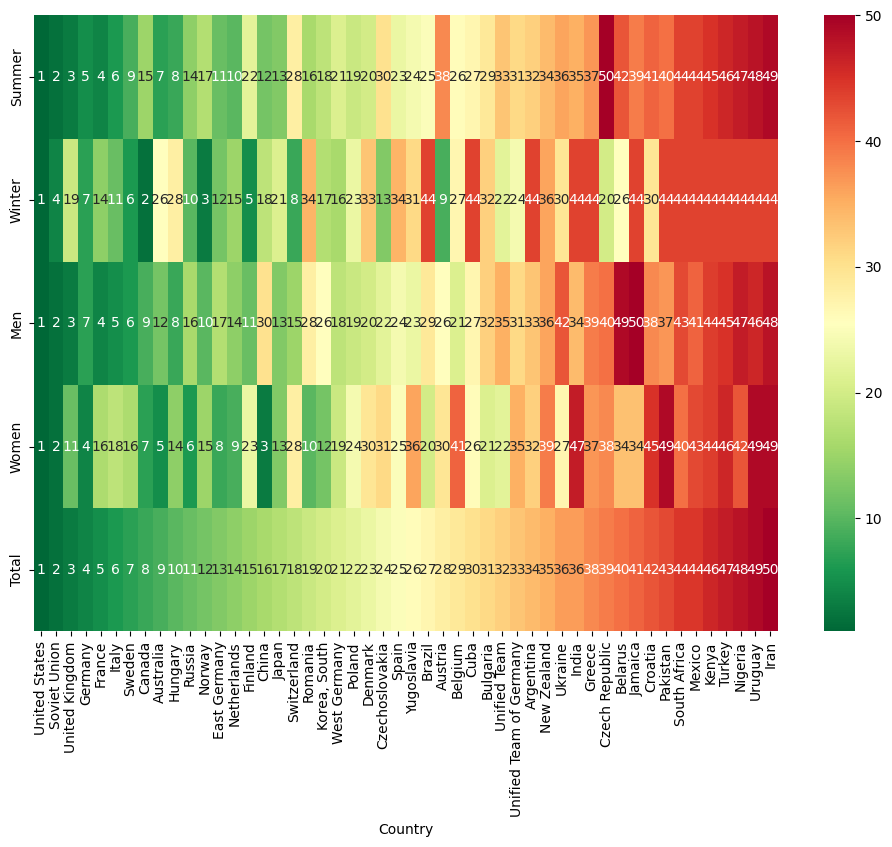

In [91]:
plt.figure(figsize= (12, 8))
sns.heatmap(ranks.T, annot= True, cmap= 'RdYlGn_r')
plt.show()

## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

In [92]:
np.where(ranks.Summer == ranks.Winter)

(array([ 0, 43, 44], dtype=int64),)

In [93]:
ranks.iloc[np.where(ranks.Summer == ranks.Winter)].index

Index(['United States', 'South Africa', 'Mexico'], dtype='object', name='Country')

In [94]:
ranks.sort_values(by = "Winter")

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Canada,15.0,2.0,9.0,7.0,8.0
Norway,17.0,3.0,10.0,15.0,12.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
Finland,22.0,5.0,11.0,23.0,15.0
Sweden,9.0,6.0,6.0,16.5,7.0
Germany,5.0,7.0,7.0,4.0,4.0
Switzerland,28.0,8.0,15.0,28.0,18.0
Austria,38.0,9.0,25.5,29.5,28.0


In [95]:
ranks.iloc[np.where(ranks.Summer > ranks.Winter)].sort_values(by = "Winter")

,Summer,Winter,Men,Women,Total
Country,,,,,
Canada,15.0,2.0,9.0,7.0,8.0
Norway,17.0,3.0,10.0,15.0,12.0
Finland,22.0,5.0,11.0,23.0,15.0
Sweden,9.0,6.0,6.0,16.5,7.0
Switzerland,28.0,8.0,15.0,28.0,18.0
Austria,38.0,9.0,25.5,29.5,28.0
Russia,14.0,10.0,16.0,6.0,11.0
Czechoslovakia,30.0,13.0,22.0,31.0,24.0
West Germany,21.0,16.0,18.0,19.0,21.0


In [96]:
ranks.iloc[np.where(ranks.Summer < ranks.Winter)].sort_values(by = "Summer")

,Summer,Winter,Men,Women,Total
Country,,,,,
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
France,4.0,14.0,4.0,16.5,5.0
Germany,5.0,7.0,7.0,4.0,4.0
Italy,6.0,11.0,5.0,18.0,6.0
Australia,7.0,25.5,12.0,5.0,9.0
Hungary,8.0,28.0,8.0,14.0,10.0
Netherlands,10.0,15.0,14.0,9.0,14.0
East Germany,11.0,12.0,17.0,8.0,13.0


In [97]:
summer_vs_winter_diff = ranks.Summer.sub(ranks.Winter)
summer_vs_winter_diff.sort_values(inplace= True)

In [98]:
summer_vs_winter_diff = summer_vs_winter_diff.to_frame(name = "Rank_diff")

In [99]:
plt.rcdefaults()

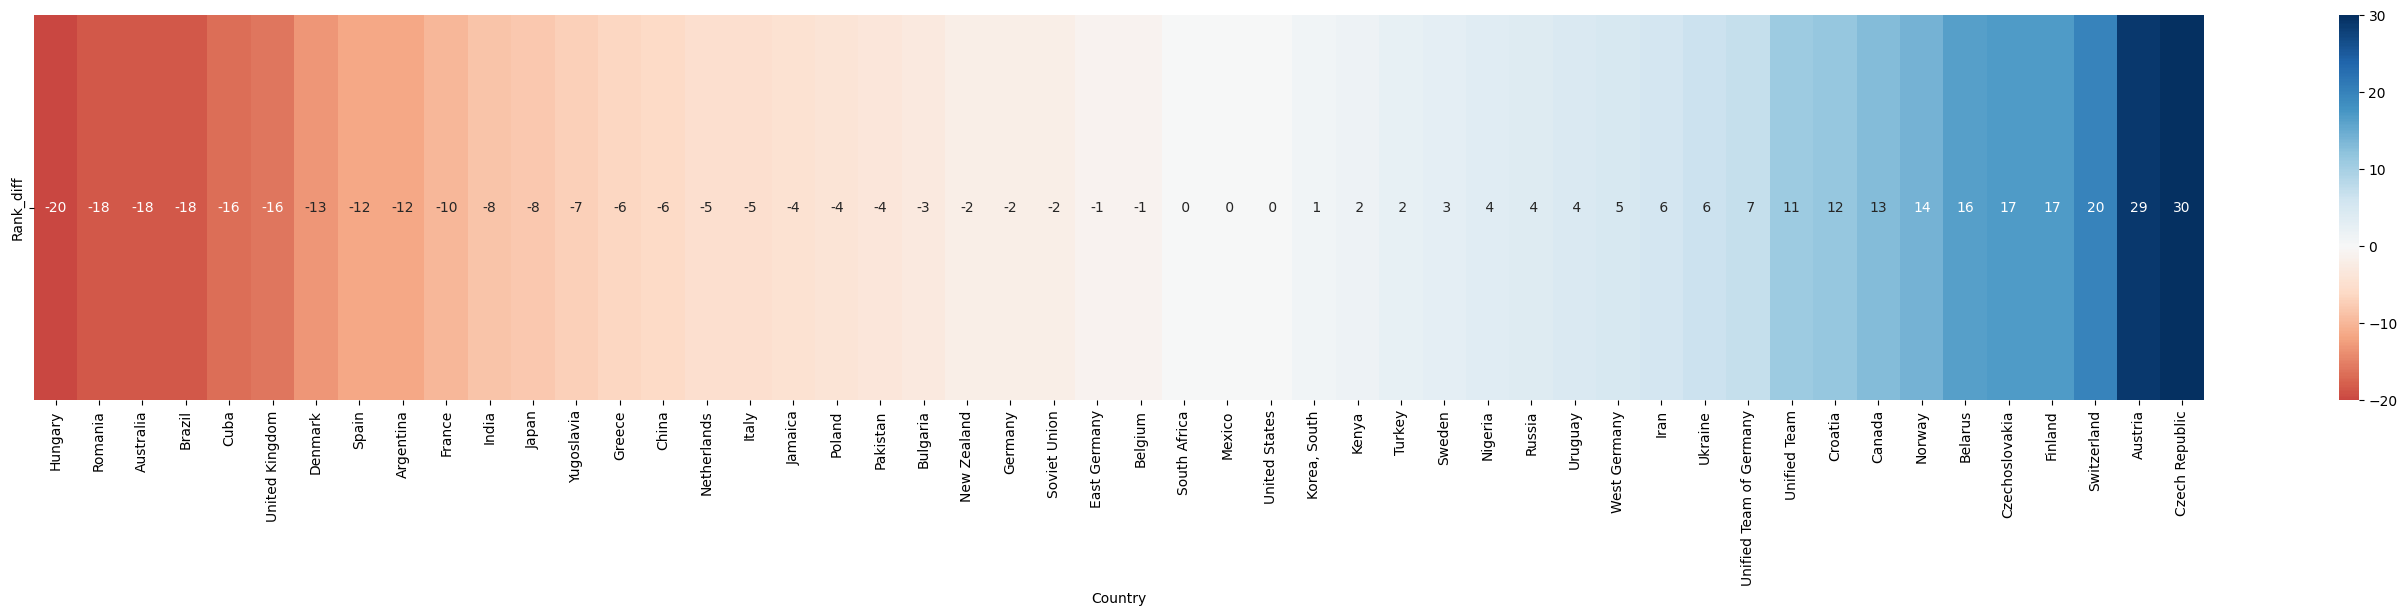

In [100]:
plt.figure(figsize= (35, 5))
sns.heatmap(summer_vs_winter_diff.T, cmap= "RdBu", annot= True, center = 0, fmt="2.0f")
plt.show()

## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

What could be the reasons?

In [101]:
ranks.iloc[np.where(ranks.Men == ranks.Women)]

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
Japan,13.0,21.0,13.0,13.0,17.0
Kenya,45.0,43.5,44.0,44.0,46.0


In [102]:
ranks.iloc[np.where(ranks.Men > ranks.Women)]

,Summer,Winter,Men,Women,Total
Country,,,,,
Germany,5.0,7.0,7.0,4.0,4.0
Canada,15.0,2.0,9.0,7.0,8.0
Australia,7.0,25.5,12.0,5.0,9.0
Russia,14.0,10.0,16.0,6.0,11.0
East Germany,11.0,12.0,17.0,8.0,13.0
Netherlands,10.0,15.0,14.0,9.0,14.0
China,12.0,18.0,30.0,3.0,16.0
Romania,16.0,34.5,28.0,10.0,19.0
"Korea, South",18.0,17.0,25.5,12.0,20.0


In [103]:
ranks.iloc[np.where(ranks.Men < ranks.Women)]

,Summer,Winter,Men,Women,Total
Country,,,,,
United Kingdom,3.0,19.0,3.0,11.0,3.0
France,4.0,14.0,4.0,16.5,5.0
Italy,6.0,11.0,5.0,18.0,6.0
Sweden,9.0,6.0,6.0,16.5,7.0
Hungary,8.0,28.0,8.0,14.0,10.0
Norway,17.0,3.0,10.0,15.0,12.0
Finland,22.0,5.0,11.0,23.0,15.0
Switzerland,28.0,8.0,15.0,28.0,18.0
West Germany,21.0,16.0,18.0,19.0,21.0


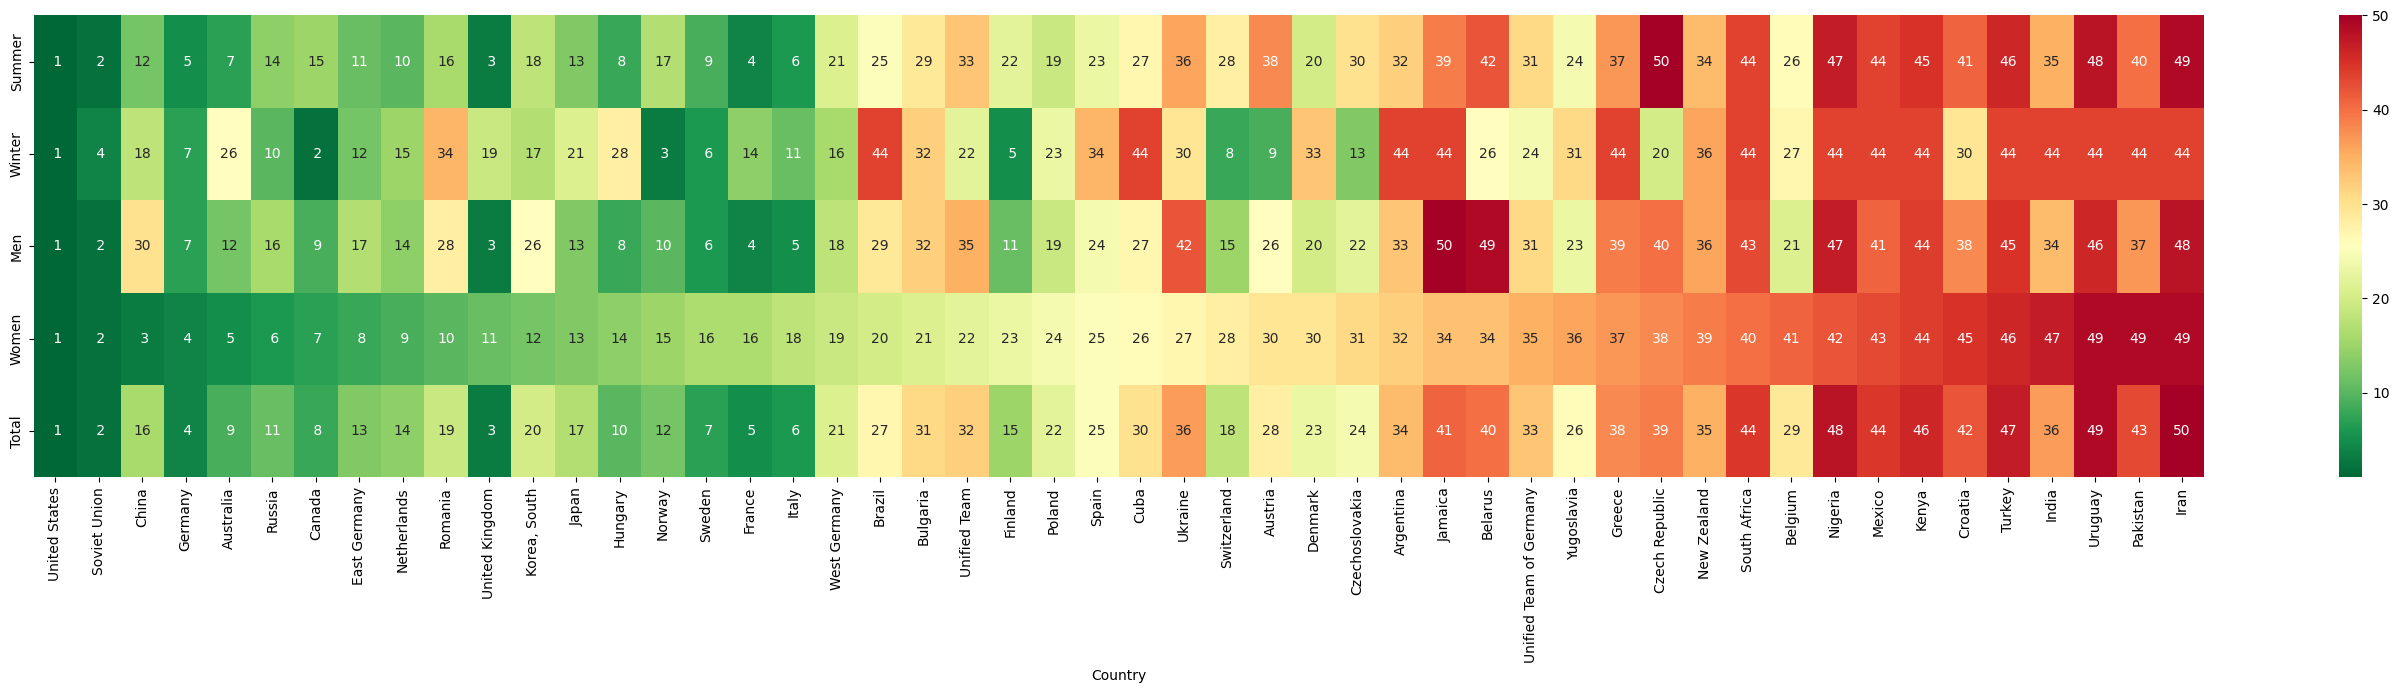

In [104]:
plt.figure(figsize= (35,6))
sns.heatmap(ranks.sort_values(by = "Women").T, cmap= "RdYlGn_r" ,annot= True, fmt = "2.0f")
plt.show()

In [105]:
man_vs_woman_diff = ranks.Men.sub(ranks.Women).sort_values()

In [106]:
man_vs_woman_diff = man_vs_woman_diff.to_frame(name= "rank_diff") # minus value mean MEN are more succesfull

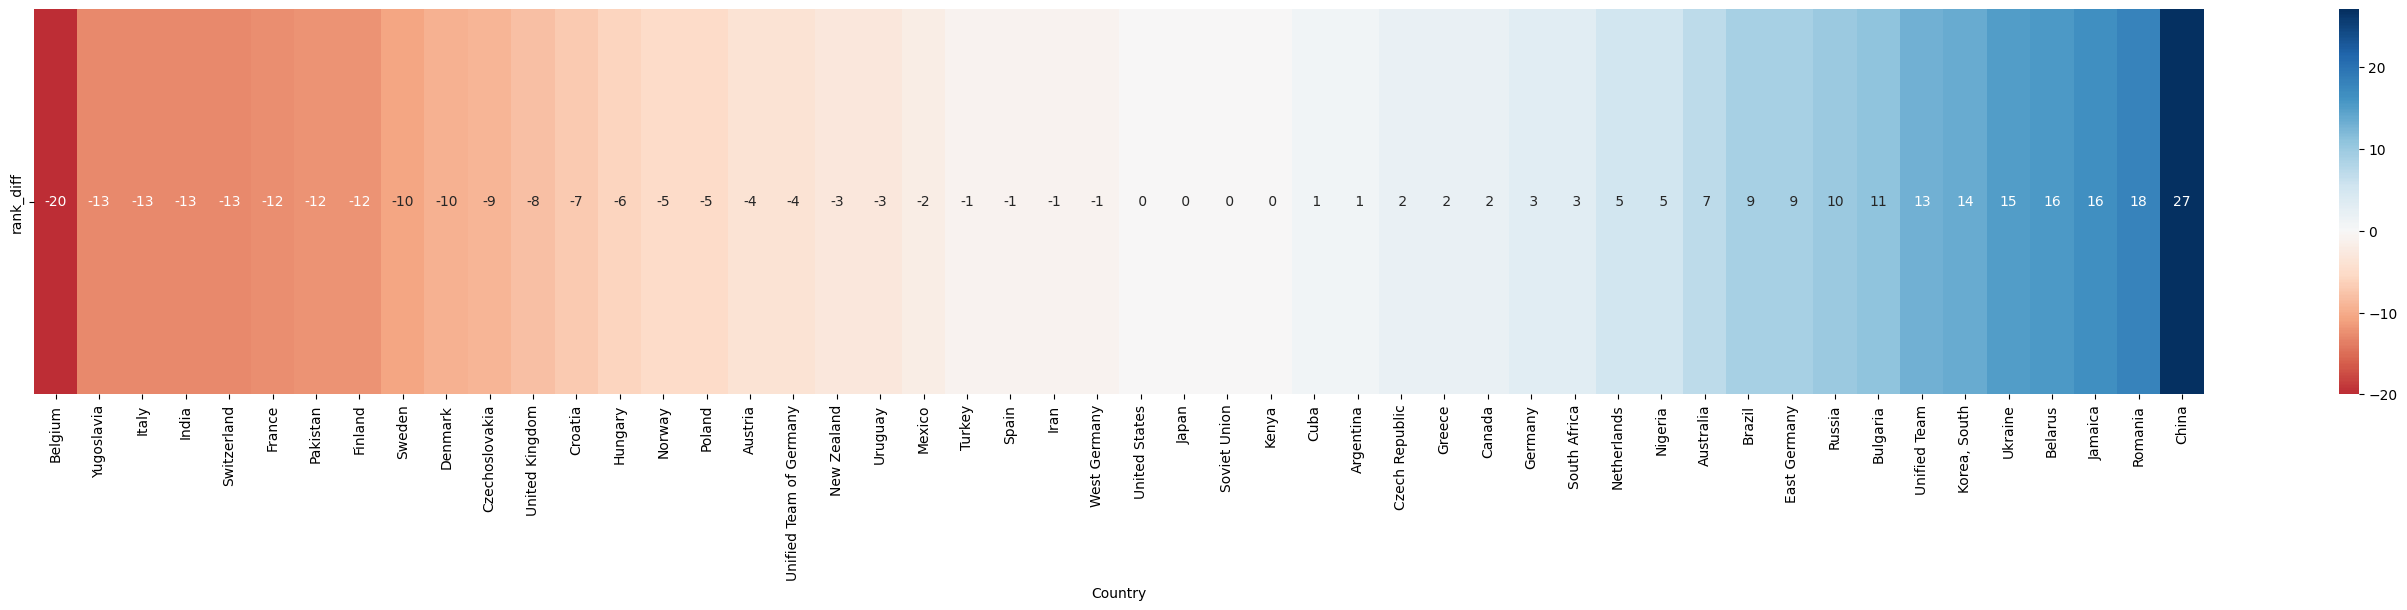

In [107]:
plt.figure(figsize= (35, 5))
sns.heatmap(man_vs_woman_diff.T, cmap= "RdBu", annot= True, center = 0, fmt="2.0f")
plt.show()

## Do Traditions matter?

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

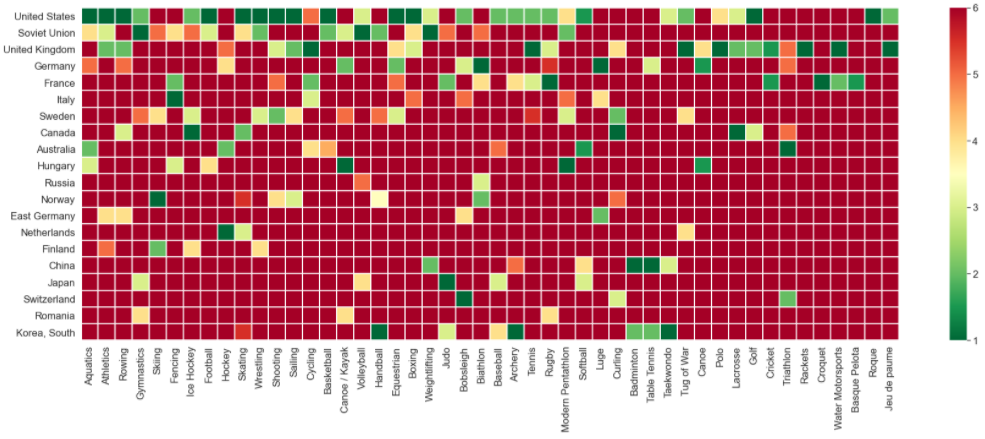

In [108]:
olympic

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,United Kingdom
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,United States
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Canada
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter,Czech Republic


In [111]:
sports_by_country = pd.crosstab(olympic.Country, olympic.Sport, margins= True, margins_name= "Total").sort_values(by = "Total", ascending= False)

In [112]:
sports_by_country.drop("Total", inplace= True)
sports_by_country.drop(columns= "Total", inplace= True)

In [113]:
sports_by_country = sports_by_country.rank(ascending= False)

In [110]:
sports = olympic.Sport.value_counts().index # CORE olympic sports in order from the most popular

In [128]:
sports_by_country = sports_by_country[sports]
sports_by_country.head()

Sport,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
Country,,,,,,,,,,,,,,,,,,,,,
United States,1.0,1.0,1.0,2.0,8.0,7.0,2.0,1.0,12.0,1.0,...,3.0,1.0,9.5,74.0,73.5,73.5,74.0,74.0,1.0,2.0
Soviet Union,4.0,3.0,7.0,1.0,5.0,4.0,5.0,3.0,11.0,4.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
United Kingdom,10.5,2.0,2.0,19.0,34.5,15.0,10.0,20.0,5.0,16.0,...,2.0,2.0,5.0,1.5,1.0,73.5,1.0,74.0,73.5,1.0
Germany,5.0,7.0,5.0,16.0,6.0,6.0,13.0,7.5,4.0,9.0,...,74.5,74.5,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
France,14.0,8.0,11.0,17.0,10.0,2.0,79.5,23.0,83.0,17.0,...,74.5,74.5,79.0,1.5,73.5,1.0,2.0,1.5,73.5,74.0


In [142]:
sports_by_country = sports_by_country.apply(lambda x: x.astype("category"))

In [143]:
sports_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, United States to Senegal
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Aquatics           145 non-null    category
 1   Athletics          145 non-null    category
 2   Rowing             145 non-null    category
 3   Gymnastics         145 non-null    category
 4   Skiing             145 non-null    category
 5   Fencing            145 non-null    category
 6   Ice Hockey         145 non-null    category
 7   Football           145 non-null    category
 8   Hockey             145 non-null    category
 9   Skating            145 non-null    category
 10  Wrestling          145 non-null    category
 11  Shooting           145 non-null    category
 12  Sailing            145 non-null    category
 13  Cycling            145 non-null    category
 14  Basketball         145 non-null    category
 15  Canoe / Kayak      145 non-null    category
 1

In [169]:
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.667, 0, 0.667])
colorbar.set_ticklabels(['B', 'A', 'C'])

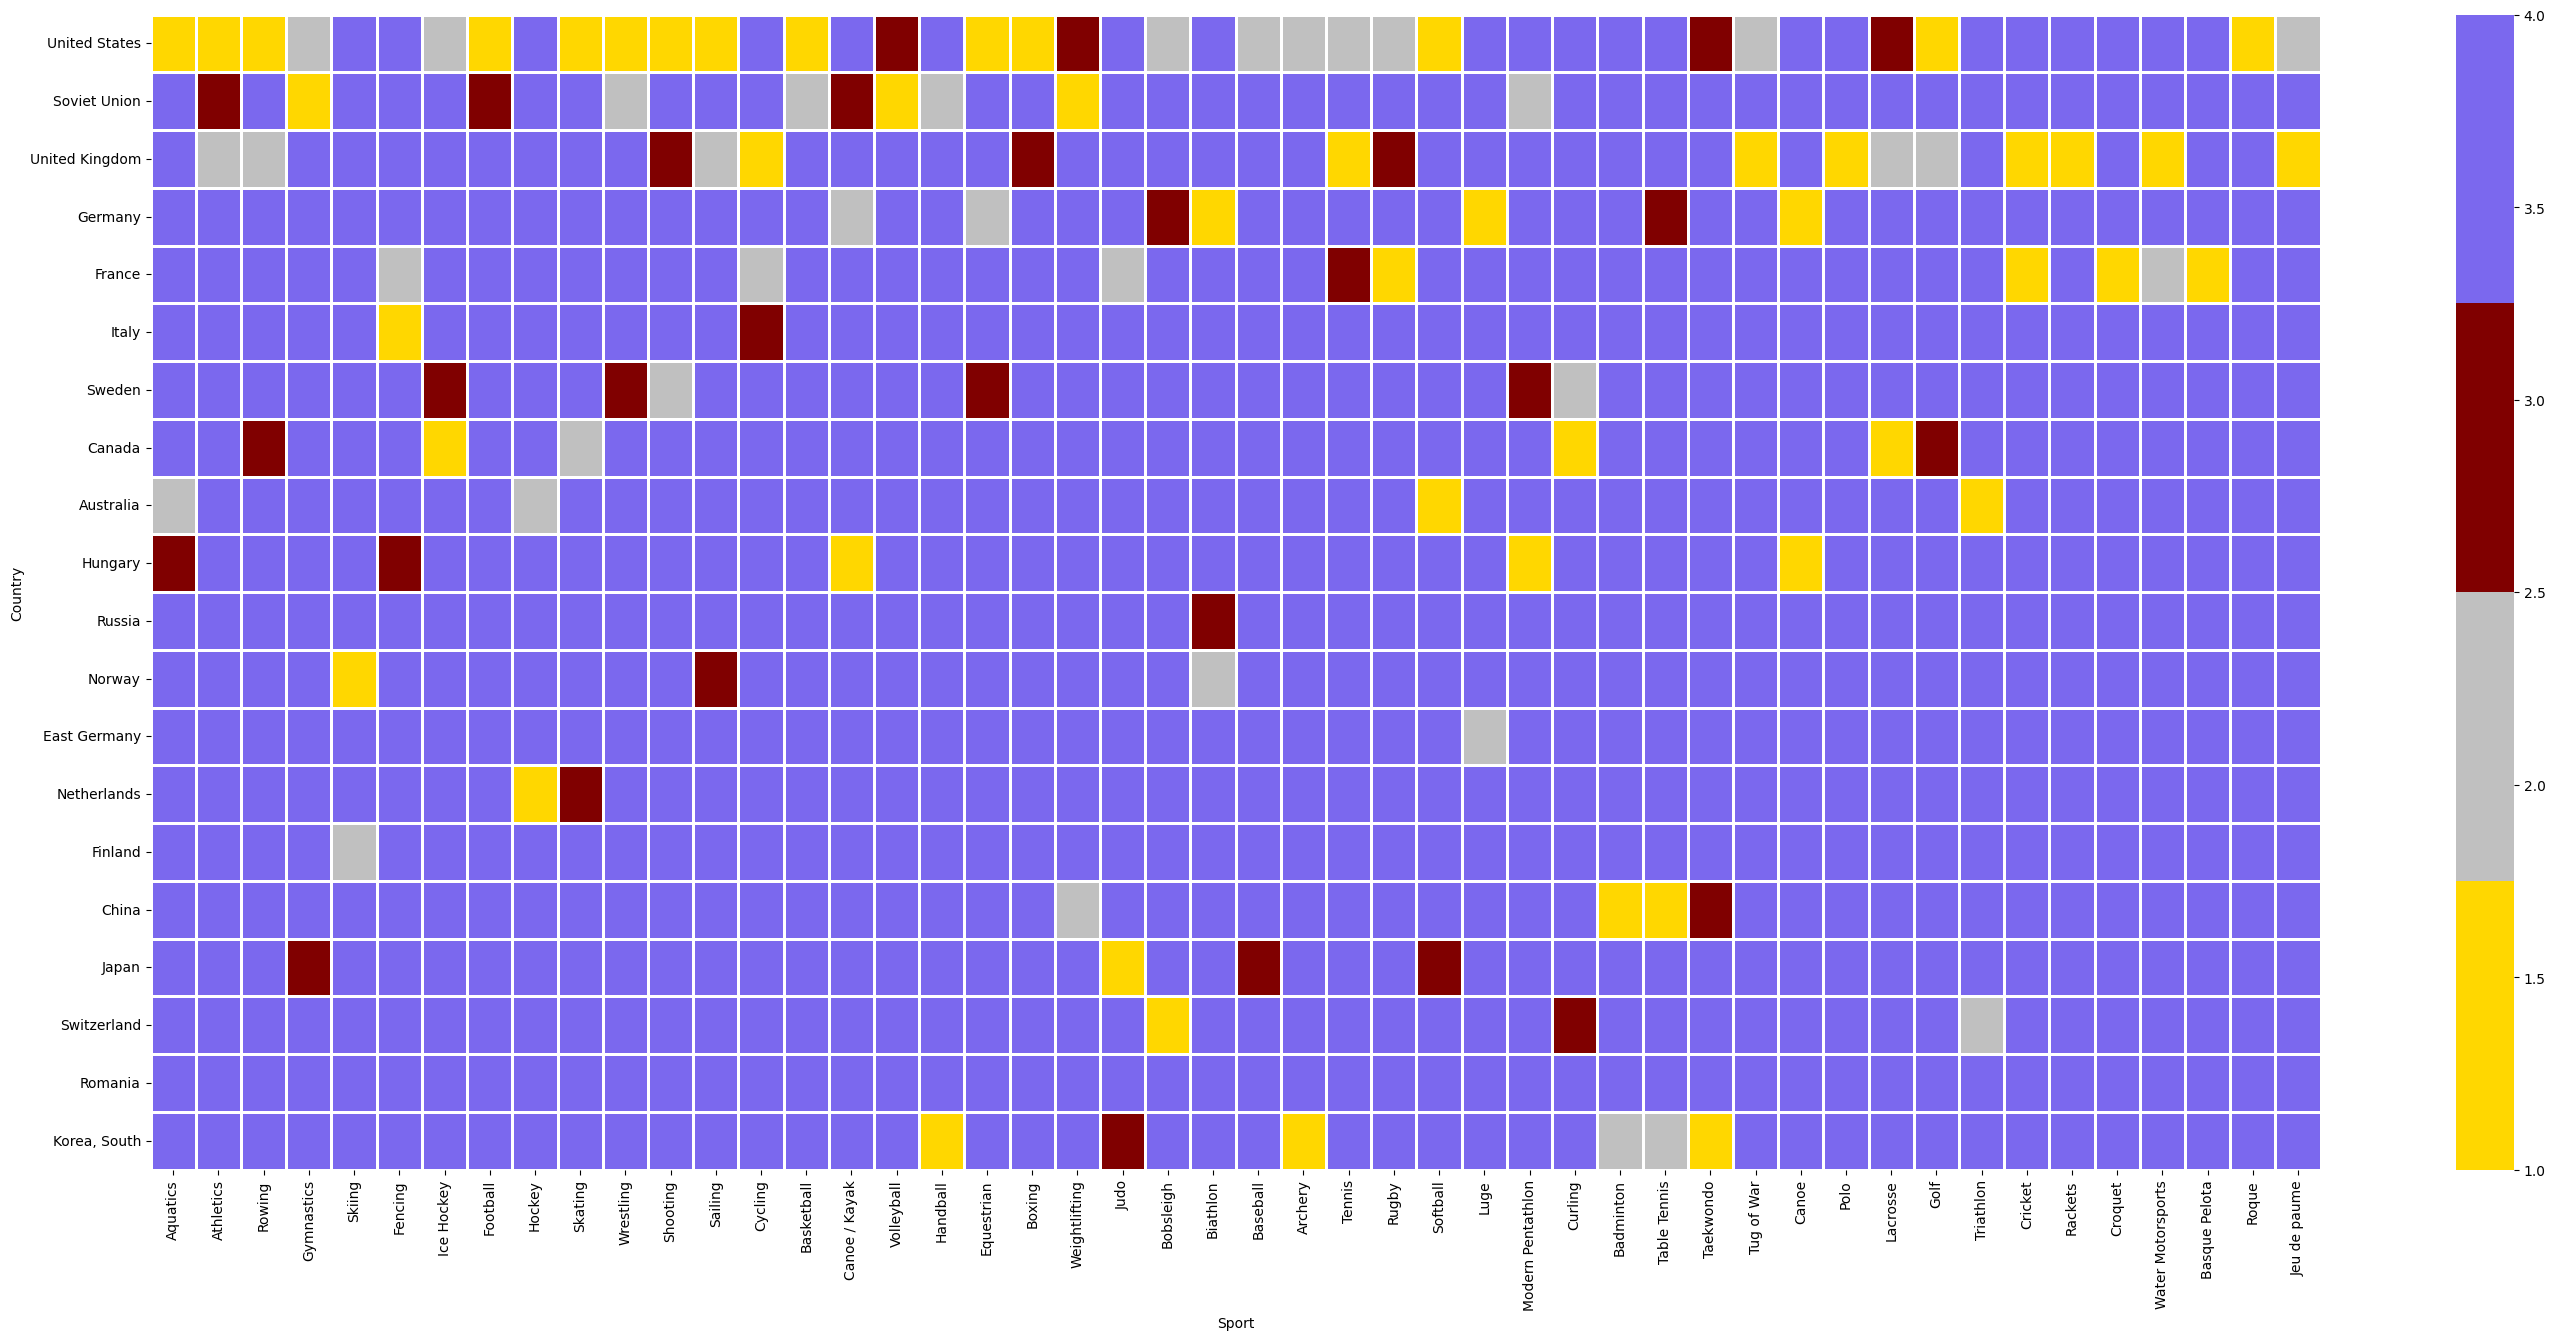

In [175]:
from matplotlib.colors import LinearSegmentedColormap

myColors = ((255/255,215/255,0/255, 1), (192/255 , 192/255 , 192/255 , 1.0), (128/255, 0.0, 0.0, 1.0), (123/255, 104/255, 238/255, 1))

cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

#ax = sns.heatmap(sports_by_country.iloc[0:20, :], cmap= cmap, vmin = 1, vmax = 4, linewidths = 1)

#colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([1.5, 2, 3])
#colorbar.set_ticklabels(['B', 'A', 'C'])

plt.figure(figsize= (35,15))
sns.heatmap(sports_by_country.iloc[0:20, :], cmap= cmap, vmin = 1, vmax = 4, linewidths = 1)
plt.show()

# Missing full Country Names (see Data Cleaning Part 1)

In [ ]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}